In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os
import jpype
import math
if not jpype.isJVMStarted():
    jpype.startJVM()
import asposecells
from asposecells.api import Workbook, LoadOptions, SaveFormat, FileFormatType

In [2]:
path_str = str(os.getcwd())
path_str = path_str + '/SRS/'
dir_list_tmp = os.listdir(path_str)

dir_list = []
for i in dir_list_tmp:
    if '.csv' in i:
        dir_list.append(i)

In [3]:
if not jpype.isJVMStarted():
    jpype.startJVM()
path_str_tmp = str(os.getcwd())

path_str_tmp = path_str_tmp + '/Data_Excel/'
for f in os.listdir(path_str_tmp):
    os.remove(os.path.join(path_str_tmp, f))
    
for i in dir_list:
    name = path_str + i
    # Create CSV LoadOptions object
    loadOptions =  LoadOptions(FileFormatType.CSV)

    # Create a Workbook object with CSV file's path and the loadOptions
    workbook =  Workbook(name, loadOptions)

    # Save CSV as XLSX
    excel_name = path_str_tmp + i.split('.')[0] + ".xlsx" 

    workbook.save(excel_name , SaveFormat.XLSX)

In [4]:
path_str = str(os.getcwd())
path_str = path_str + '/Data_Excel/'
dir_list_tmp = os.listdir(path_str)

dir_list = []
for i in dir_list_tmp:
    if '.xlsx' in i:
        dir_list.append(i)

In [5]:
count = 0
df_master = pd.DataFrame()
for i in dir_list:
    name = path_str + i
    df_tmp = pd.read_excel(name)
    df_tmp = df_tmp.iloc[4:]
    if count == 0:
        df_master['Freq'] = df_tmp.iloc[:,0]
    
    col_name = 'CH3_Upper_Envelope_' + str(count) 
    count = count + 1
    df_master[col_name] = df_tmp.iloc[:,3]

In [6]:
df_master

,Freq,CH3_Upper_Envelope_0,CH3_Upper_Envelope_1,CH3_Upper_Envelope_2,CH3_Upper_Envelope_3,CH3_Upper_Envelope_4,CH3_Upper_Envelope_5,CH3_Upper_Envelope_6,CH3_Upper_Envelope_7,CH3_Upper_Envelope_8,...,CH3_Upper_Envelope_76,CH3_Upper_Envelope_77,CH3_Upper_Envelope_78,CH3_Upper_Envelope_79,CH3_Upper_Envelope_80,CH3_Upper_Envelope_81,CH3_Upper_Envelope_82,CH3_Upper_Envelope_83,CH3_Upper_Envelope_84,CH3_Upper_Envelope_85
4,0.481281,0.041792,0.11628,0.048174,0.102822,0.120389,0.128469,0.140195,0.029104,0.062931,...,0.065396,0.136372,0.094556,0.139541,0.102748,0.116022,0.101859,0.073,0.678823,0.065968
5,0.488281,0.041998,0.116339,0.04827,0.102978,0.121514,0.128474,0.140762,0.029135,0.064698,...,0.065042,0.138178,0.096109,0.138481,0.102646,0.116622,0.102867,0.072766,0.680373,0.066173
6,0.495383,0.04218,0.11632,0.04834,0.103099,0.122445,0.128441,0.141329,0.029184,0.066507,...,0.064633,0.139947,0.097732,0.13793,0.102529,0.117155,0.103849,0.072592,0.681643,0.066329
7,0.502589,0.042338,0.116224,0.048383,0.103186,0.123171,0.128357,0.141893,0.029451,0.068359,...,0.064168,0.141676,0.099429,0.138307,0.102466,0.117617,0.104802,0.072401,0.682625,0.066434
8,0.509899,0.04247,0.116053,0.048399,0.103239,0.123676,0.128223,0.14245,0.030087,0.070254,...,0.063649,0.143361,0.101198,0.138583,0.102461,0.118005,0.105722,0.072308,0.683492,0.066485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,458.502,6.135234,11.5229,0.699613,2.916853,15.89535,2.486637,21.13906,1.17617,1.327641,...,2.089621,14.1485,4.670255,5.070042,5.18927,6.581362,1.241006,2.192573,14.77467,8.747812
480,465.1711,5.999578,11.4785,0.697573,2.896938,15.9549,2.47372,21.03009,1.160318,1.328301,...,2.108963,14.07791,4.641458,5.021444,5.137722,6.522648,1.232514,2.153282,14.61647,8.338588
481,471.9371,5.801418,11.42567,0.695629,2.880975,15.99508,2.463349,20.82953,1.148596,1.32983,...,2.131195,14.07306,4.637758,4.969782,5.07916,6.466392,1.2263,2.110899,14.44024,7.92052
482,478.8016,5.549258,11.33958,0.695249,2.868516,15.99067,2.454052,20.54933,1.139802,1.332009,...,2.155604,14.13079,4.662905,4.915205,5.015304,6.393754,1.222514,2.065412,14.24717,7.488067


In [7]:
k_val = float(input('Please enter k value. \n'))

In [8]:
mean_lst = []
std_lst = []
upper_limit = []
for i in range(0,len(df_master)):
    mean_val = statistics.mean(df_master.iloc[i,1:])
    mean_lst.append(mean_val)
    std_val = statistics.stdev(df_master.iloc[i,1:])
    std_lst.append(std_val)
    
    upper_val = mean_val + (k_val * std_val)
    
    upper_limit.append(upper_val)

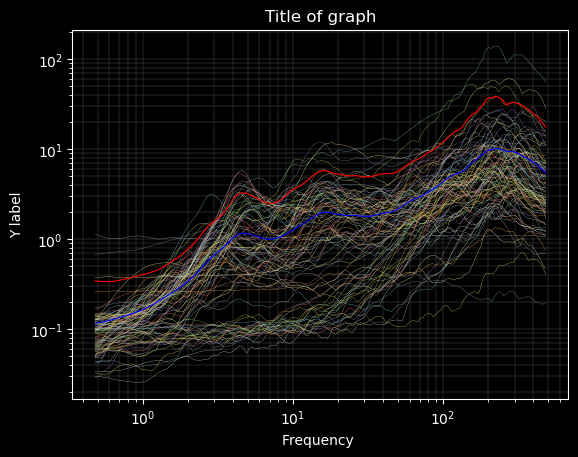

<Figure size 640x480 with 0 Axes>

In [9]:
plt.style.use('dark_background')
for i in df_master.columns:
    if 'Freq' not in i:
        x = df_master['Freq']
        y = df_master[i]
        plt.loglog(x, y, linewidth=0.2)

x = df_master['Freq']
y = upper_limit
plt.loglog(x, y, linewidth=0.8, color = "red")

x = df_master['Freq']
y = mean_lst
plt.loglog(x, y, linewidth=0.8, color = "blue")

plt.xlabel("Frequency ")
plt.ylabel("Y label")
plt.title("Title of graph")
plt.grid(True,which='both',linewidth=0.2,color = "gray")

fig1 = plt.gcf()
plt.show()
plt.draw()
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Graphs/full_graph_SRS.png'
fig1.savefig(path_str_tmp, dpi=2000)

In [10]:
mean_lst_200 = []
std_lst_200 = []
upper_limit_200 = []
lower_limit_200 = []
df_master_200 = df_master[df_master['Freq']<200.0001]
for i in range(0,len(df_master_200)):
    mean_val = statistics.mean(df_master_200.iloc[i,1:])
    mean_lst_200.append(mean_val)
    std_val = statistics.stdev(df_master_200.iloc[i,1:])
    std_lst_200.append(std_val)

    upper_val = mean_val + (k_val * std_val)
    lower_val = mean_val - (k_val * std_val)

    upper_limit_200.append(upper_val)
    lower_limit_200.append(lower_val)

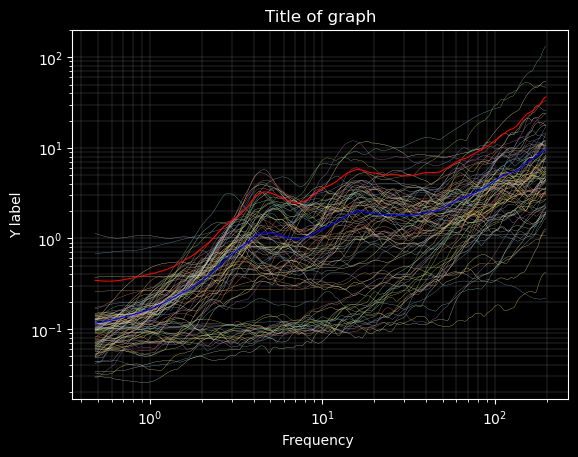

<Figure size 640x480 with 0 Axes>

In [11]:
plt.style.use('dark_background')

for i in df_master_200.columns:
    if 'Freq' not in i :
        x = df_master_200['Freq']
        y = df_master_200[i]
        plt.loglog(x, y, linewidth=0.2)

x = df_master_200['Freq']
y = upper_limit_200
plt.loglog(x, y, linewidth=0.8, color = "red")

x = df_master_200['Freq']
y = mean_lst_200
plt.loglog(x, y, linewidth=0.8, color = "blue")

plt.xlabel("Frequency ")
plt.ylabel("Y label")
plt.title("Title of graph")
plt.grid(True,which='both',linewidth=0.2,color = "gray")

fig1 = plt.gcf()
plt.show()
plt.draw()
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Graphs/200_graph_SRS.png'
fig1.savefig(path_str_tmp, dpi=2000)

In [12]:
df_master = df_master.reset_index(drop=True)

In [13]:
df_master['average'] = mean_lst
df_master['upper'] = upper_limit

In [14]:
df_master.loc[len(df_master)] = 0
df_master.loc[len(df_master)] = 0

In [15]:
count = 0
for j in df_master.columns:
    if 'Freq' not in j:
        val_list = []
        val_list.append(0)
        for i in range(0,len(df_master)-3):
            up_val1 = df_master.iloc[i][j]
            up_val2 = df_master.iloc[i+1][j]
            frq_val1 = df_master.iloc[i][0]
            frq_val2 = df_master.iloc[i+1][0]
            val_list.append(0.5*(up_val1+up_val2)/(frq_val1/frq_val2))
        
        col_name = 'Val_'+str(count)
        count = count + 1
        sum_val = sum(val_list)
        sqrt_val = math.sqrt(sum(val_list))
        val_list.append(sum_val)
        val_list.append(sqrt_val)
        if 'average' in j:
            col_name = 'average_val'
        if 'upper' in j:
            col_name = 'upper_val'
        df_master.loc[:,col_name]= pd.Series(val_list)
#         df_master[col_name] = pd.Series(val_list)

In [16]:
df_master

,Freq,CH3_Upper_Envelope_0,CH3_Upper_Envelope_1,CH3_Upper_Envelope_2,CH3_Upper_Envelope_3,CH3_Upper_Envelope_4,CH3_Upper_Envelope_5,CH3_Upper_Envelope_6,CH3_Upper_Envelope_7,CH3_Upper_Envelope_8,...,Val_78,Val_79,Val_80,Val_81,Val_82,Val_83,Val_84,Val_85,average_val,upper_val
0,0.481281,0.041792,0.11628,0.048174,0.102822,0.120389,0.128469,0.140195,0.029104,0.062931,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.488281,0.041998,0.116339,0.04827,0.102978,0.121514,0.128474,0.140762,0.029135,0.064698,...,0.096719,0.141033,0.104191,0.118014,0.103852,0.073943,0.689483,0.067031,0.117950,0.348896
2,0.495383,0.04218,0.11632,0.04834,0.103099,0.122445,0.128441,0.141329,0.029184,0.066507,...,0.098330,0.140216,0.104080,0.118589,0.104862,0.073736,0.690914,0.067215,0.118326,0.347805
3,0.502589,0.042338,0.116224,0.048383,0.103186,0.123171,0.128357,0.141893,0.029451,0.068359,...,0.100014,0.140128,0.103989,0.119093,0.105843,0.073551,0.692056,0.067347,0.118739,0.346770
4,0.509899,0.04247,0.116053,0.048399,0.103239,0.123676,0.128223,0.14245,0.030087,0.070254,...,0.101772,0.140459,0.103954,0.119524,0.106793,0.073407,0.692994,0.067426,0.119188,0.345788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,471.9371,5.801418,11.42567,0.695629,2.880975,15.99508,2.463349,20.82953,1.148596,1.32983,...,4.707092,5.068275,5.182744,6.588984,1.247289,2.163102,14.739673,8.247800,5.784198,19.135047
478,478.8016,5.549258,11.33958,0.695249,2.868516,15.99067,2.454052,20.54933,1.139802,1.332009,...,4.717972,5.014384,5.120646,6.523601,1.242216,2.118528,14.552340,7.816355,5.667404,18.562449
479,485.766,5.259032,11.2078,0.697121,2.858798,15.93183,2.444317,20.20787,1.133631,1.334601,...,4.757392,4.958061,5.054056,6.435064,1.239485,2.070900,14.348575,7.369929,5.553145,17.979430
480,0,0,0,0,0,0,0,0,0,0,...,1384.069479,1173.916592,1001.122729,1634.972604,397.474687,489.310420,2339.905463,1362.175328,1317.401585,4195.376332


In [17]:
# mean_val = statistics.mean(mean_lst)
# mean_sqrt = statistics.sqrt(mean_val)
# mean_lst.append(mean_val)
# mean_lst.append(mean_sqrt)

# mean_val = statistics.mean(upper_limit)
# mean_sqrt = statistics.sqrt(mean_val)
# upper_limit.append(mean_val)
# upper_limit.append(mean_sqrt)

# df_master['average'] = mean_lst
# df_master['upper'] = upper_limit

In [18]:
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Master_Data/master_df_SRS_full.xlsx'
df_master.to_excel(path_str_tmp,index=False)

path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Master_Data/master_df_SRS_full.csv'
df_master.to_csv(path_str_tmp,index=False)

In [19]:
df_master_200

,Freq,CH3_Upper_Envelope_0,CH3_Upper_Envelope_1,CH3_Upper_Envelope_2,CH3_Upper_Envelope_3,CH3_Upper_Envelope_4,CH3_Upper_Envelope_5,CH3_Upper_Envelope_6,CH3_Upper_Envelope_7,CH3_Upper_Envelope_8,...,CH3_Upper_Envelope_76,CH3_Upper_Envelope_77,CH3_Upper_Envelope_78,CH3_Upper_Envelope_79,CH3_Upper_Envelope_80,CH3_Upper_Envelope_81,CH3_Upper_Envelope_82,CH3_Upper_Envelope_83,CH3_Upper_Envelope_84,CH3_Upper_Envelope_85
4,0.481281,0.041792,0.11628,0.048174,0.102822,0.120389,0.128469,0.140195,0.029104,0.062931,...,0.065396,0.136372,0.094556,0.139541,0.102748,0.116022,0.101859,0.073,0.678823,0.065968
5,0.488281,0.041998,0.116339,0.04827,0.102978,0.121514,0.128474,0.140762,0.029135,0.064698,...,0.065042,0.138178,0.096109,0.138481,0.102646,0.116622,0.102867,0.072766,0.680373,0.066173
6,0.495383,0.04218,0.11632,0.04834,0.103099,0.122445,0.128441,0.141329,0.029184,0.066507,...,0.064633,0.139947,0.097732,0.13793,0.102529,0.117155,0.103849,0.072592,0.681643,0.066329
7,0.502589,0.042338,0.116224,0.048383,0.103186,0.123171,0.128357,0.141893,0.029451,0.068359,...,0.064168,0.141676,0.099429,0.138307,0.102466,0.117617,0.104802,0.072401,0.682625,0.066434
8,0.509899,0.04247,0.116053,0.048399,0.103239,0.123676,0.128223,0.14245,0.030087,0.070254,...,0.063649,0.143361,0.101198,0.138583,0.102461,0.118005,0.105722,0.072308,0.683492,0.066485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,187.2884,6.073627,23.56001,1.422053,7.073278,27.21373,3.915953,48.29314,1.767092,1.539052,...,5.710583,18.15182,8.421223,4.827337,11.2101,10.9274,1.768246,3.086029,13.87,11.02383
418,190.0125,6.032697,23.97988,1.50216,7.318547,26.4569,3.944818,48.03917,1.784157,1.648962,...,5.58143,18.77743,8.829731,5.050319,10.90053,11.40486,1.817091,3.154628,13.70647,10.66363
419,192.7763,5.881104,24.13849,1.583908,7.525302,26.01126,4.035816,47.66757,1.786718,1.759612,...,5.456533,19.21873,9.2044,5.234591,10.59967,11.79387,1.848285,3.163473,13.42963,10.15925
420,195.5803,5.831407,23.99978,1.647672,7.676537,25.90955,4.158739,47.14112,1.838472,1.867715,...,5.759367,19.44989,9.52962,5.371495,10.57358,12.06489,1.854593,3.118348,13.14772,9.540071


In [20]:
df_master_200['average'] = mean_lst_200
df_master_200['upper'] = upper_limit_200

/var/folders/jv/1mvy7wsn2_d8rnmqfpp8nmgm0000gn/T/ipykernel_2715/313770749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master_200['average'] = mean_lst_200
/var/folders/jv/1mvy7wsn2_d8rnmqfpp8nmgm0000gn/T/ipykernel_2715/313770749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master_200['upper'] = upper_limit_200


In [21]:
df_master_200 = df_master_200.reset_index(drop=True)
df_master_200.loc[len(df_master_200)] = 0
df_master_200.loc[len(df_master_200)] = 0

In [22]:
count = 0
for j in df_master_200.columns:
    if 'Freq' not in j:
        val_list = []
        val_list.append(0)
        for i in range(0,len(df_master_200)-3):
            if df_master_200['Freq'][i] < 200.0001:
                up_val1 = df_master_200.iloc[i][j]
                up_val2 = df_master_200.iloc[i+1][j]
                frq_val1 = df_master_200.iloc[i][0]
                frq_val2 = df_master_200.iloc[i+1][0]
                val_list.append(0.5*(float(up_val1)+float(up_val2))/(frq_val1/frq_val2))
            else:
                break
        
        col_name = 'Val_'+str(count)
        count = count + 1
        sum_val = sum(val_list)
        sqrt_val = math.sqrt(sum(val_list))
        val_list.append(sum_val)
        val_list.append(sqrt_val)
        if 'average' in j:
            col_name = 'average_val'
        if 'upper' in j:
            col_name = 'upper_val'
        df_master_200.loc[:,col_name]= pd.Series(val_list)

In [23]:
path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Master_Data/master_df_SRS_200.xlsx'
df_master_200.to_excel(path_str_tmp,index=False)

path_str_tmp = str(os.getcwd())
path_str_tmp = path_str_tmp + '/Master_Data/master_df_SRS_200.csv'
df_master_200.to_csv(path_str_tmp,index=False)

In [24]:
df_master_200

,Freq,CH3_Upper_Envelope_0,CH3_Upper_Envelope_1,CH3_Upper_Envelope_2,CH3_Upper_Envelope_3,CH3_Upper_Envelope_4,CH3_Upper_Envelope_5,CH3_Upper_Envelope_6,CH3_Upper_Envelope_7,CH3_Upper_Envelope_8,...,Val_78,Val_79,Val_80,Val_81,Val_82,Val_83,Val_84,Val_85,average_val,upper_val
0,0.481281,0.041792,0.11628,0.048174,0.102822,0.120389,0.128469,0.140195,0.029104,0.062931,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.488281,0.041998,0.116339,0.04827,0.102978,0.121514,0.128474,0.140762,0.029135,0.064698,...,0.096719,0.141033,0.104191,0.118014,0.103852,0.073943,0.689483,0.067031,0.117950,0.348896
2,0.495383,0.04218,0.11632,0.04834,0.103099,0.122445,0.128441,0.141329,0.029184,0.066507,...,0.098330,0.140216,0.104080,0.118589,0.104862,0.073736,0.690914,0.067215,0.118326,0.347805
3,0.502589,0.042338,0.116224,0.048383,0.103186,0.123171,0.128357,0.141893,0.029451,0.068359,...,0.100014,0.140128,0.103989,0.119093,0.105843,0.073551,0.692056,0.067347,0.118739,0.346770
4,0.509899,0.04247,0.116053,0.048399,0.103239,0.123676,0.128223,0.14245,0.030087,0.070254,...,0.101772,0.140459,0.103954,0.119524,0.106793,0.073407,0.692994,0.067426,0.119188,0.345788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,192.7763,5.881104,24.13849,1.583908,7.525302,26.01126,4.035816,47.66757,1.786718,1.759612,...,9.148222,5.217254,10.906464,11.768082,1.859345,3.205000,13.765402,10.562878,9.406398,34.844585
416,195.5803,5.831407,23.99978,1.647672,7.676537,25.90955,4.158739,47.14112,1.838472,1.867715,...,9.503256,5.380178,10.740611,12.102897,1.878369,3.186596,13.481964,9.992927,9.576405,35.962805
417,198.4251,5.779189,23.56108,1.691708,7.766132,25.62092,4.246795,46.4336,1.899427,1.969472,...,9.799632,5.494083,10.769547,12.299334,1.869773,3.118700,13.307412,9.587118,9.697234,36.744689
418,0,0,0,0,0,0,0,0,0,0,...,906.580511,765.957637,535.162264,1036.065493,299.675484,311.282501,1517.876181,697.991109,783.353027,2294.025848
